In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from estnltk.storage.postgres import PostgresStorage, IndexQuery, LayerQuery
from data_helpers.db_reader import DbReader
from data_helpers.syntax_graph import SyntaxGraph

In [2]:
collection_name = 'koondkorpus_sentences' 
collection_name = 'koondkorpus_sentences_test_5000_sg_thread'  # 

my_db_reader = DbReader(pgpass_file='~/.pgpass',\
                          schema='estonian_text_corpora',\
                          role='estonian_text_corpora_read',\
                          temporary=False,\
                          collection_name=collection_name)
my_db_reader.set_layers(['v171_named_entities', 'v172_stanza_syntax', 'v172_obl_phrases', 'v172_pre_timexes'])

INFO:storage.py:41: connecting to host: 'postgres.keeleressursid.ee', port: '5432', dbname: 'estonian-text-corpora', user: 'zummy'
INFO:storage.py:58: schema: 'estonian_text_corpora', temporary: False, role: 'estonian_text_corpora_read'


In [3]:
df = pd.read_csv('obl_compund_data_koondkorpus_sentences_test_5000_sg_thread_20230519-095846.csv')
display(df.columns)
display(df.shape)

Index(['col_id', 'root_id', 'word_count', 'consistent', 'punctuation_count',
       'consistent_wo_punctuation', 'verb_normal_count',
       'verb_unnormal_count'],
      dtype='object')

(189489, 8)

## Consistent vs inconsistent

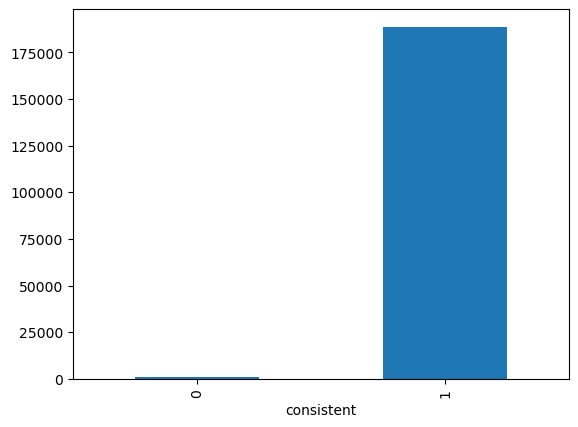

In [4]:
df['consistent'].value_counts(normalize=False).sort_values().plot(kind='bar') 
plt.show()

## Inconsistent stats

In [5]:
rslt_df = df[df['consistent'] == 0] 
rslt_df = rslt_df.reset_index()
rslt_df.shape

(858, 9)

In [6]:
rslt_df.head(1)

,index,col_id,root_id,word_count,consistent,punctuation_count,consistent_wo_punctuation,verb_normal_count,verb_unnormal_count
0,589,498,4,8,0,1,0,2,0


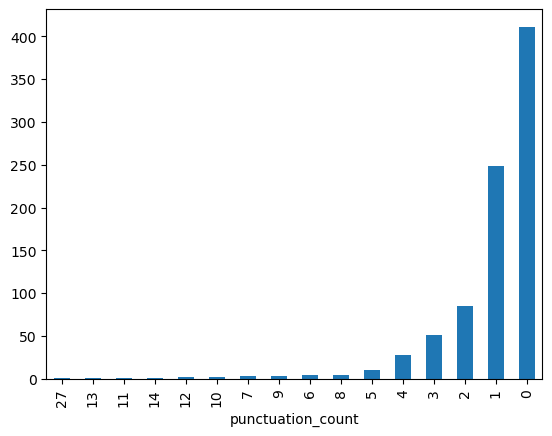

In [7]:
rslt_df['punctuation_count'].value_counts(normalize=False).sort_values().plot(kind='bar') 
plt.show()

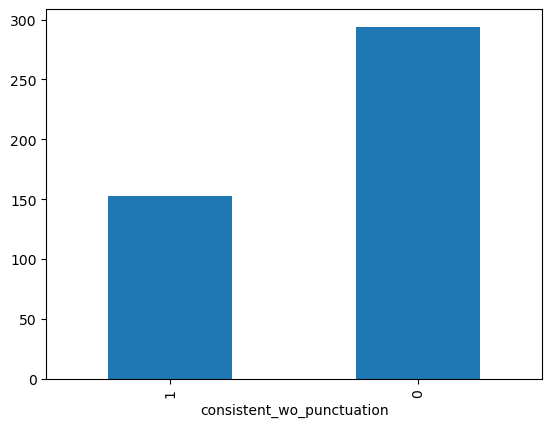

In [8]:
df3 = df[ (df['consistent'] == False) & (df['punctuation_count'] > 0) ] 

df3['consistent_wo_punctuation'].value_counts(normalize=False).sort_values().plot(kind='bar') 
plt.show()

## Draw inconsistent OBL-s

In [9]:
col_ids = [int(rslt_df['col_id'][i]) for i in range(1, rslt_df.shape[0]) ]
# TODO rewrite
col_id_with_roots = {}
for i in range(1, rslt_df.shape[0]):
    col_id = int(rslt_df['col_id'][i])
    if not col_id in col_id_with_roots:
        col_id_with_roots[col_id]=[rslt_df['root_id'][i]]
    else:
        col_id_with_roots[col_id].append(rslt_df['root_id'][i])


/Users/rabauti/opt/anaconda3/envs/py38_estnltk1.7/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


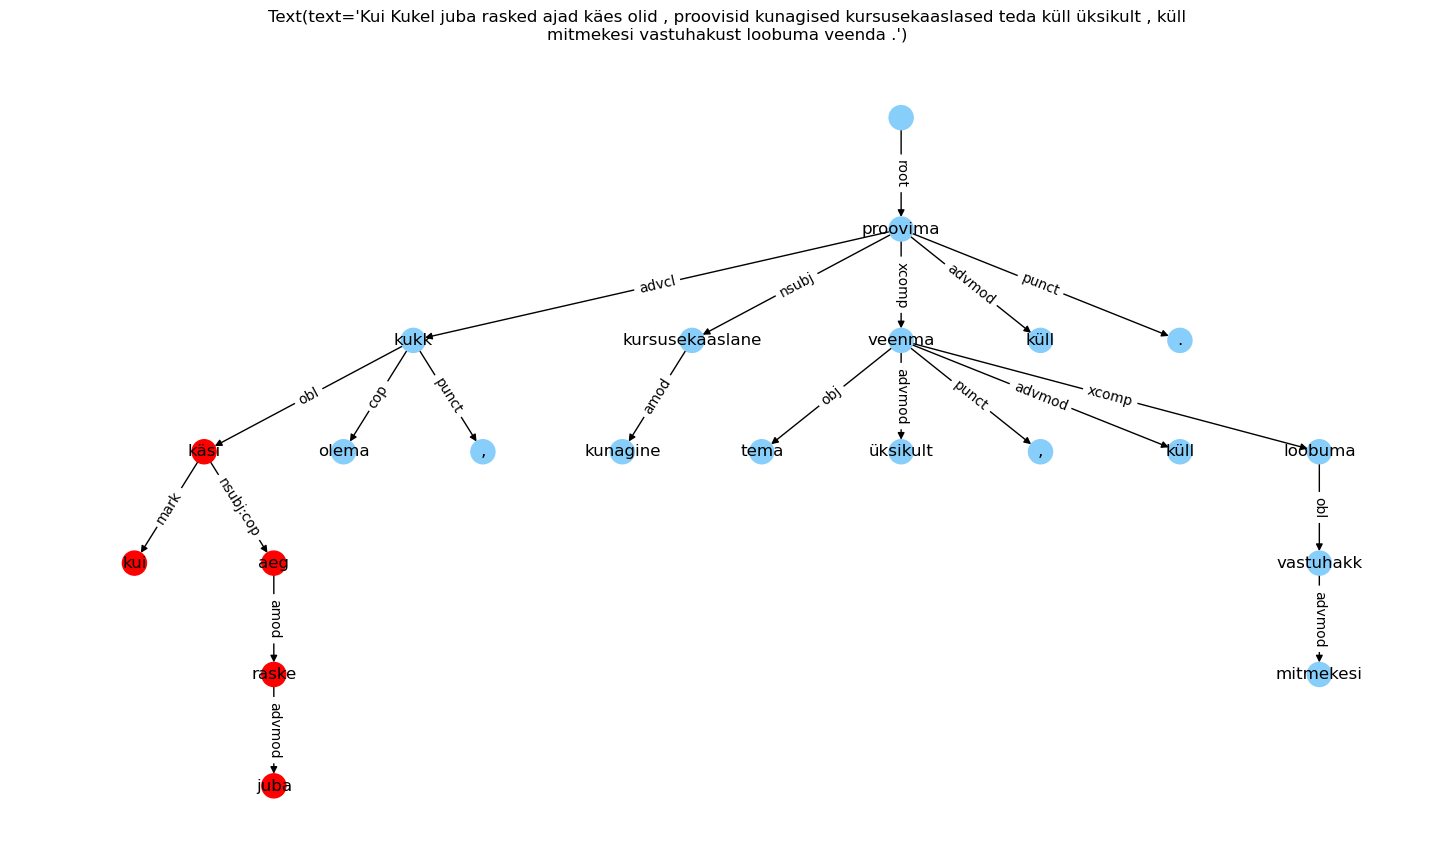

,col_id,root_id,word_count,consistent,punctuation_count,consistent_wo_punctuation,verb_normal_count,verb_unnormal_count
1471,1137,6,5,0,0,0,0,0


{'nodes': [1, 3, 4, 5, 6], 'root_id': 6, 'root_lemma': 'käsi', 'root_case': 'in'}
__Kui__ Kukel __juba__ __rasked__ __ajad__ __käes__ olid , proovisid kunagised kursusekaaslased teda küll üksikult , küll mitmekesi vastuhakust loobuma veenda .



/Users/rabauti/opt/anaconda3/envs/py38_estnltk1.7/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


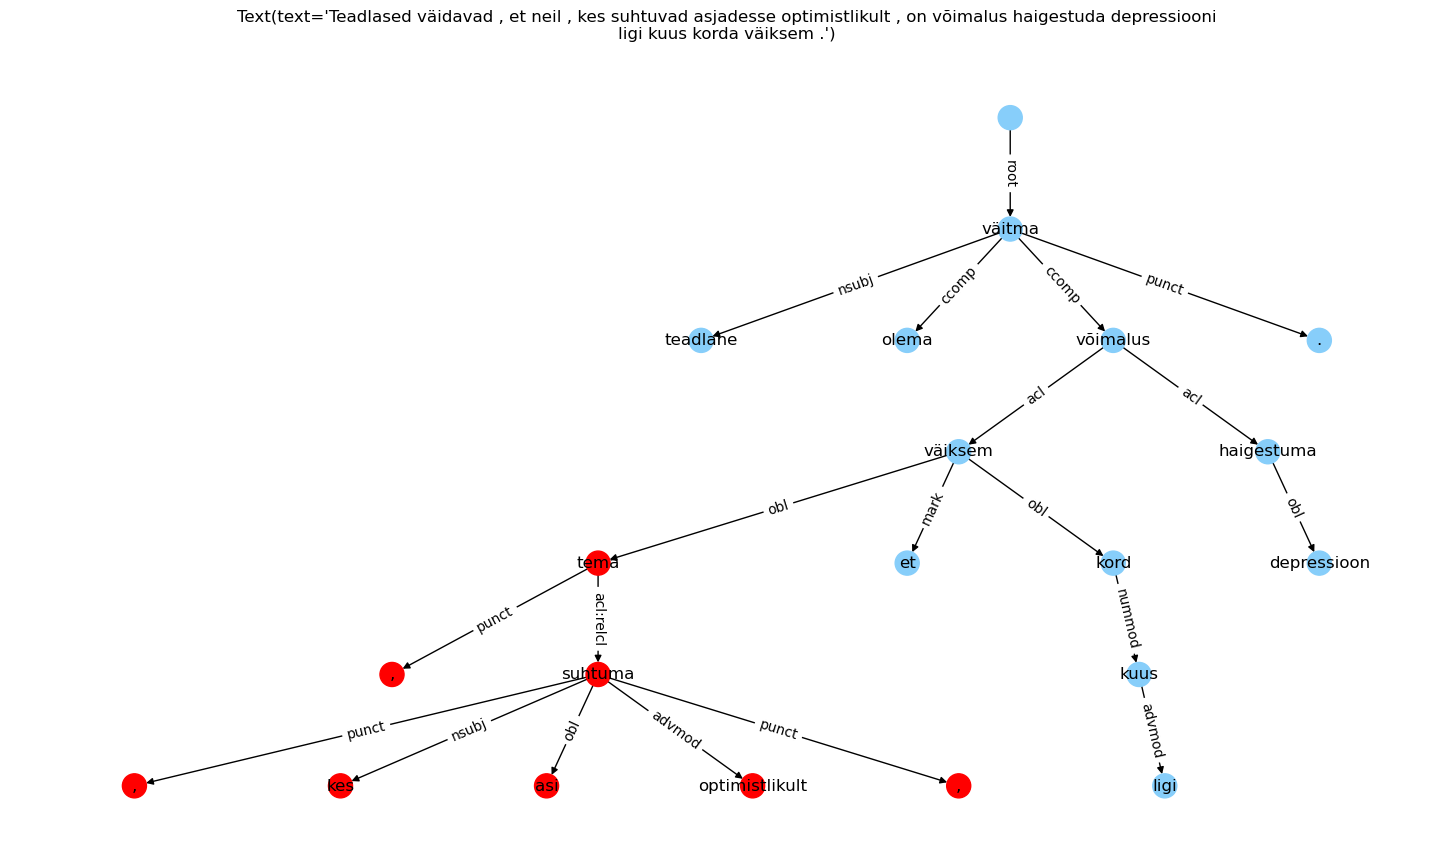

,col_id,root_id,word_count,consistent,punctuation_count,consistent_wo_punctuation,verb_normal_count,verb_unnormal_count
3686,2805,5,8,0,3,0,1,0


{'nodes': [3, 5, 6, 7, 8, 9, 10, 11], 'root_id': 5, 'root_lemma': 'tema', 'root_case': 'ad'}
Teadlased väidavad __,__ et __neil__ __,__ __kes__ __suhtuvad__ __asjadesse__ __optimistlikult__ __,__ on võimalus haigestuda depressiooni ligi kuus korda väiksem .



/Users/rabauti/opt/anaconda3/envs/py38_estnltk1.7/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


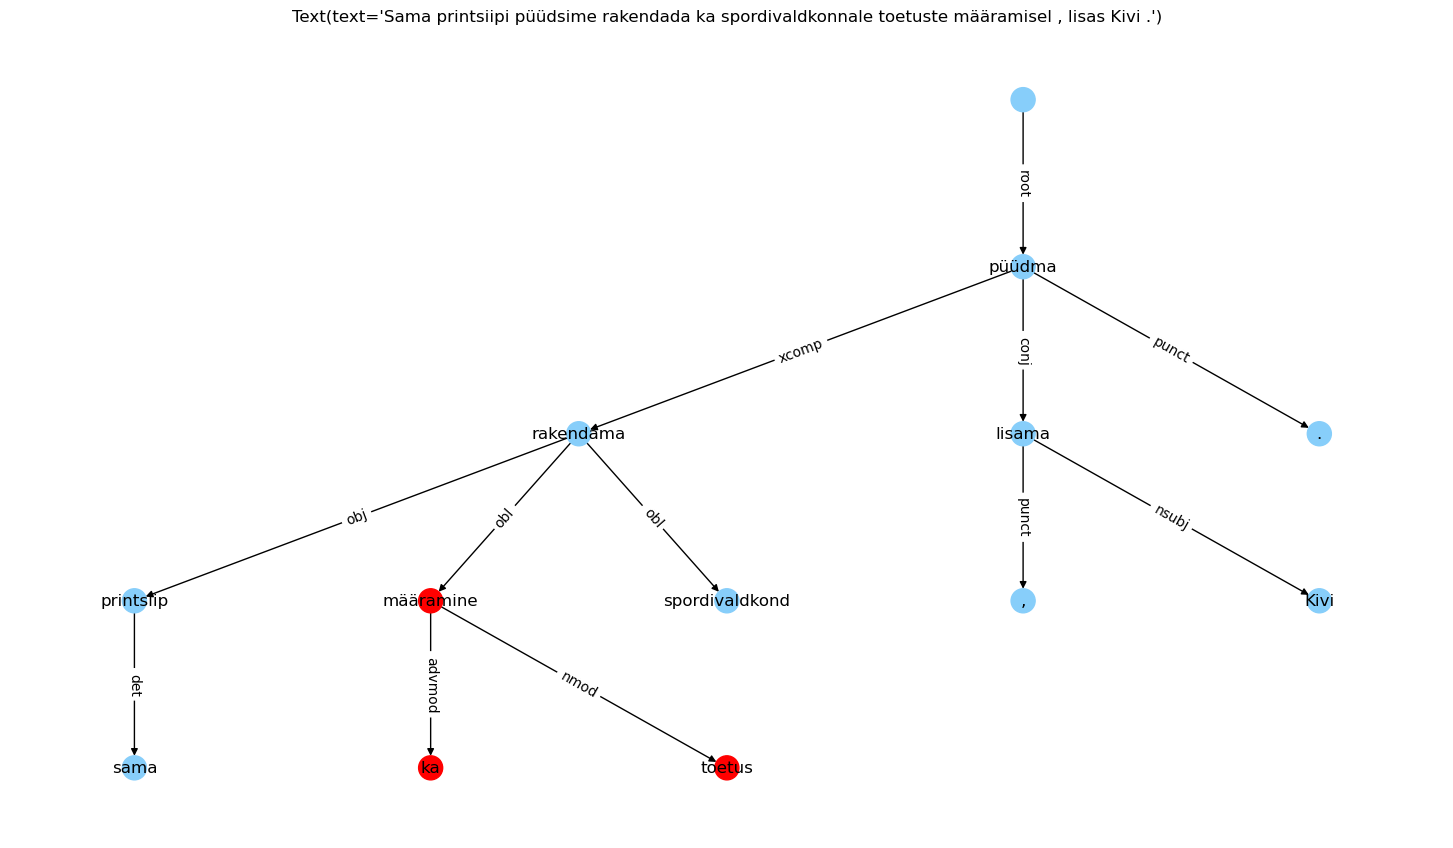

,col_id,root_id,word_count,consistent,punctuation_count,consistent_wo_punctuation,verb_normal_count,verb_unnormal_count
5832,4271,8,3,0,0,0,0,0


{'nodes': [5, 7, 8], 'root_id': 8, 'root_lemma': 'määramine', 'root_case': 'ad'}
Sama printsiipi püüdsime rakendada __ka__ spordivaldkonnale __toetuste__ __määramisel__ , lisas Kivi .



/Users/rabauti/opt/anaconda3/envs/py38_estnltk1.7/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


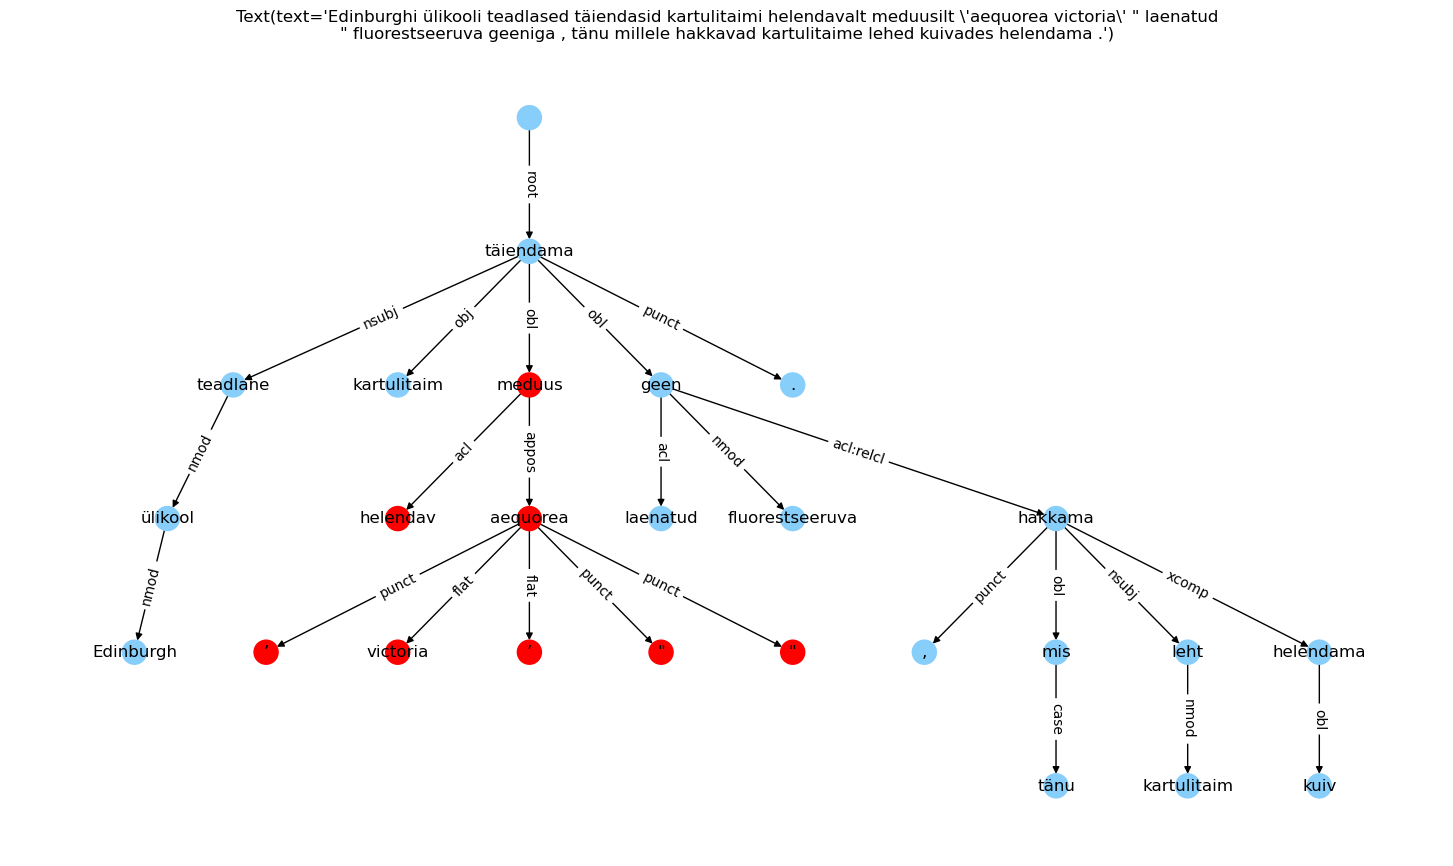

,col_id,root_id,word_count,consistent,punctuation_count,consistent_wo_punctuation,verb_normal_count,verb_unnormal_count
9989,7175,7,8,0,3,0,0,0


{'nodes': [6, 7, 8, 9, 10, 11, 12, 14], 'root_id': 7, 'root_lemma': 'meduus', 'root_case': 'abl'}
Edinburghi ülikooli teadlased täiendasid kartulitaimi __helendavalt__ __meduusilt__ __'__ __aequorea__ __victoria__ __'__ __"__ laenatud __"__ fluorestseeruva geeniga , tänu millele hakkavad kartulitaime lehed kuivades helendama .



/Users/rabauti/opt/anaconda3/envs/py38_estnltk1.7/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


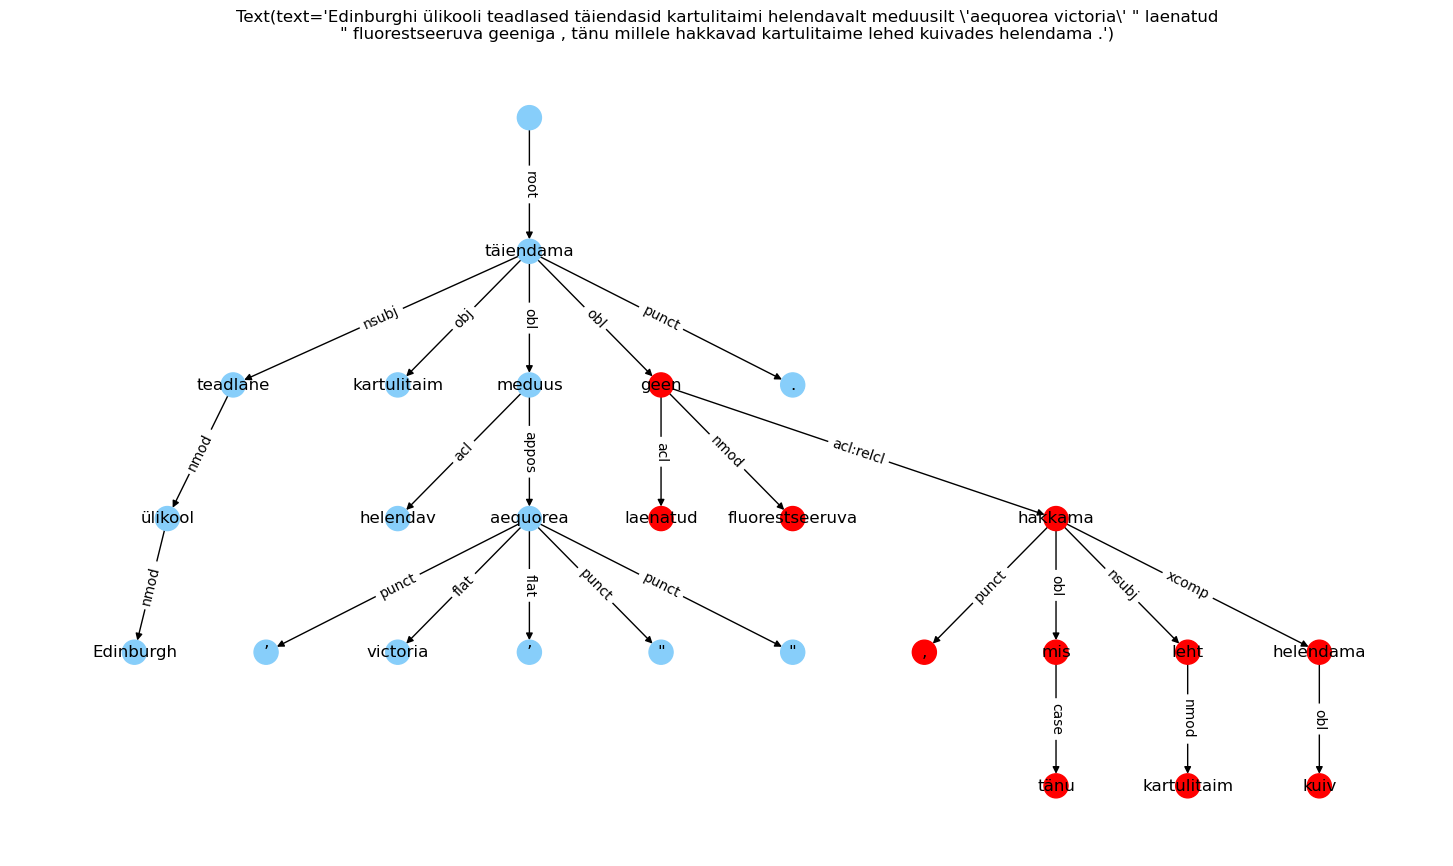

,col_id,root_id,word_count,consistent,punctuation_count,consistent_wo_punctuation,verb_normal_count,verb_unnormal_count
9990,7175,16,11,0,1,0,2,0


{'nodes': [13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'root_id': 16, 'root_lemma': 'geen', 'root_case': 'kom'}
Edinburghi ülikooli teadlased täiendasid kartulitaimi helendavalt meduusilt ' aequorea victoria ' " __laenatud__ " __fluorestseeruva__ __geeniga__ __,__ __tänu__ __millele__ __hakkavad__ __kartulitaime__ __lehed__ __kuivades__ __helendama__ .



/Users/rabauti/opt/anaconda3/envs/py38_estnltk1.7/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


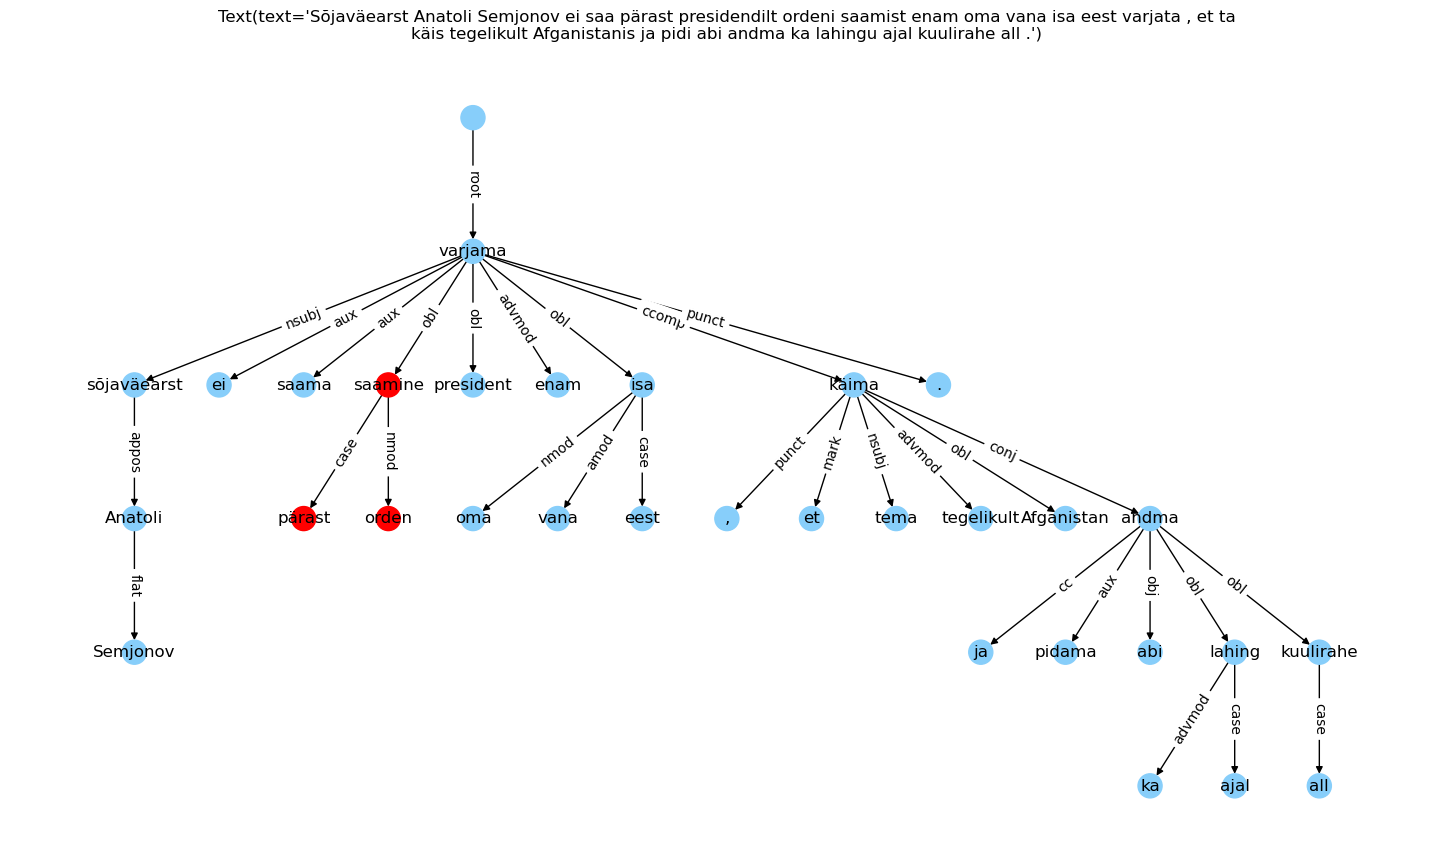

,col_id,root_id,word_count,consistent,punctuation_count,consistent_wo_punctuation,verb_normal_count,verb_unnormal_count
30015,20012,9,3,0,0,0,0,0


{'nodes': [6, 8, 9], 'root_id': 9, 'root_lemma': 'saamine', 'root_case': 'part'}
Sõjaväearst Anatoli Semjonov ei saa __pärast__ presidendilt __ordeni__ __saamist__ enam oma vana isa eest varjata , et ta käis tegelikult Afganistanis ja pidi abi andma ka lahingu ajal kuulirahe all .



/Users/rabauti/opt/anaconda3/envs/py38_estnltk1.7/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


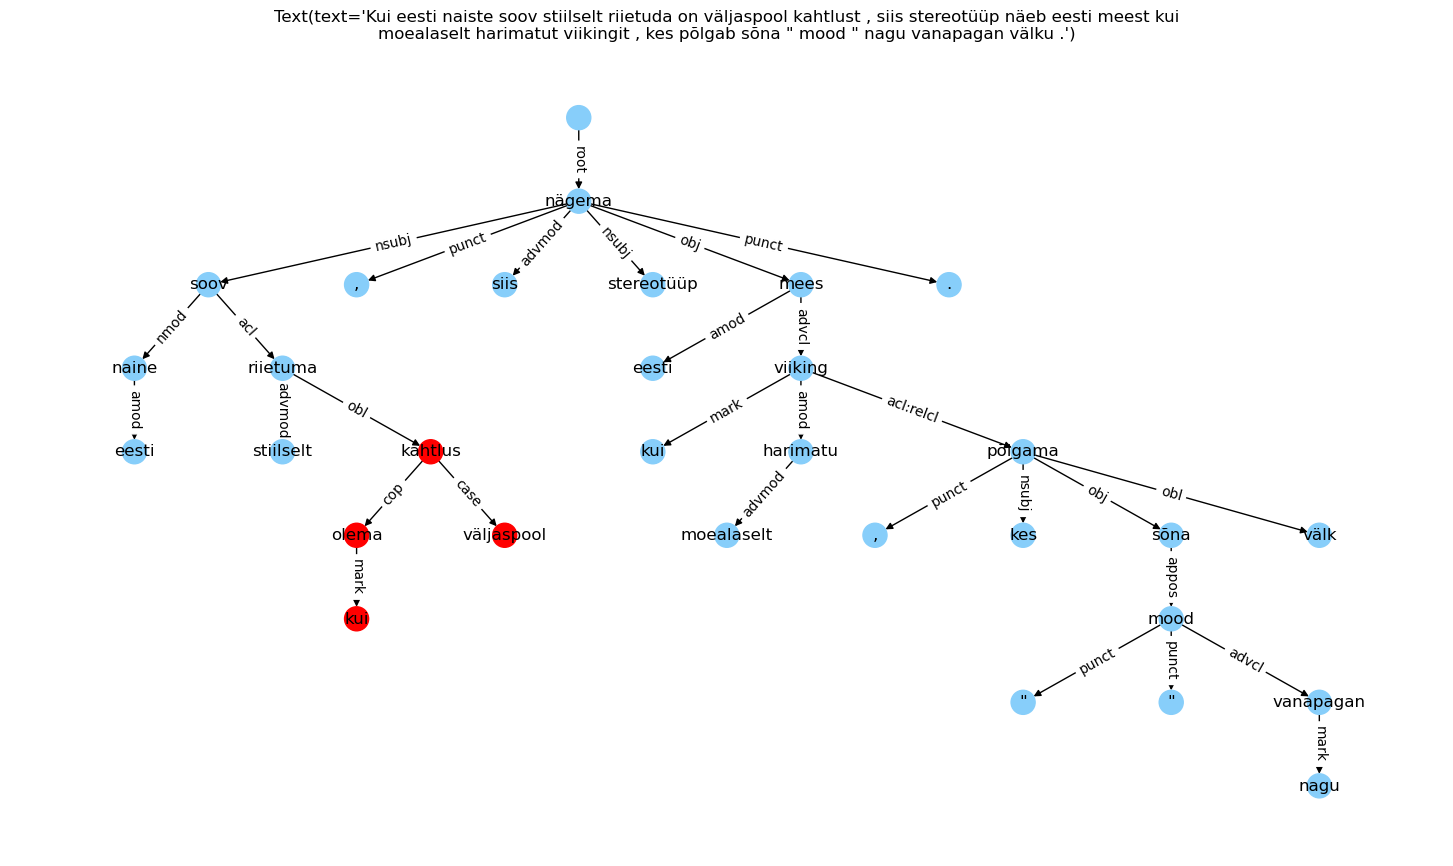

,col_id,root_id,word_count,consistent,punctuation_count,consistent_wo_punctuation,verb_normal_count,verb_unnormal_count
42376,28900,9,4,0,0,0,1,0


{'nodes': [1, 7, 8, 9], 'root_id': 9, 'root_lemma': 'kahtlus', 'root_case': 'part'}
__Kui__ eesti naiste soov stiilselt riietuda __on__ __väljaspool__ __kahtlust__ , siis stereotüüp näeb eesti meest kui moealaselt harimatut viikingit , kes põlgab sõna " mood " nagu vanapagan välku .



/Users/rabauti/opt/anaconda3/envs/py38_estnltk1.7/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


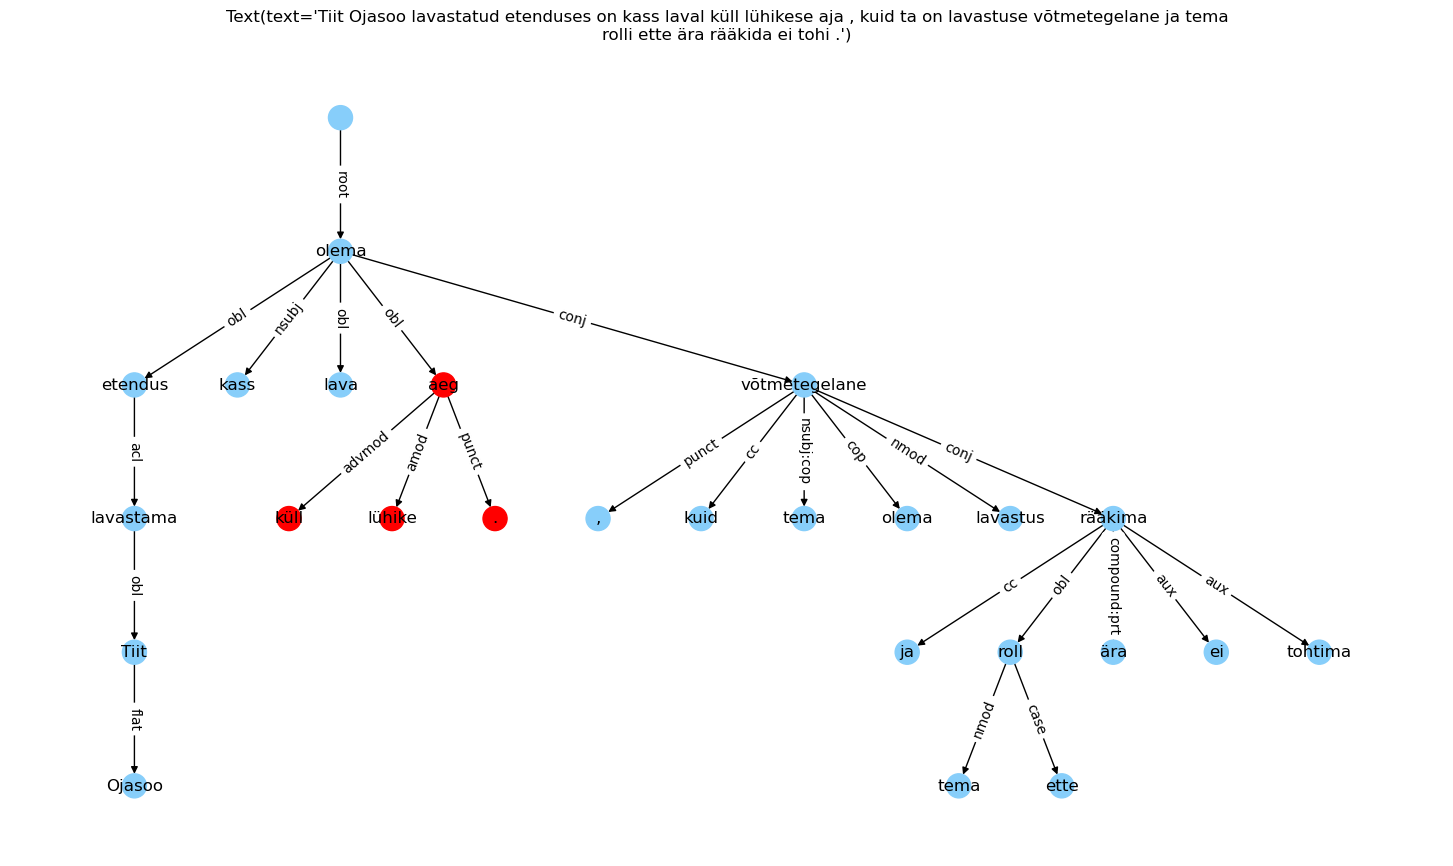

,col_id,root_id,word_count,consistent,punctuation_count,consistent_wo_punctuation,verb_normal_count,verb_unnormal_count
64240,43252,10,4,0,1,1,0,0


{'nodes': [8, 9, 10, 25], 'root_id': 10, 'root_lemma': 'aeg', 'root_case': 'gen'}
Tiit Ojasoo lavastatud etenduses on kass laval __küll__ __lühikese__ __aja__ , kuid ta on lavastuse võtmetegelane ja tema rolli ette ära rääkida ei tohi __.__



/Users/rabauti/opt/anaconda3/envs/py38_estnltk1.7/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


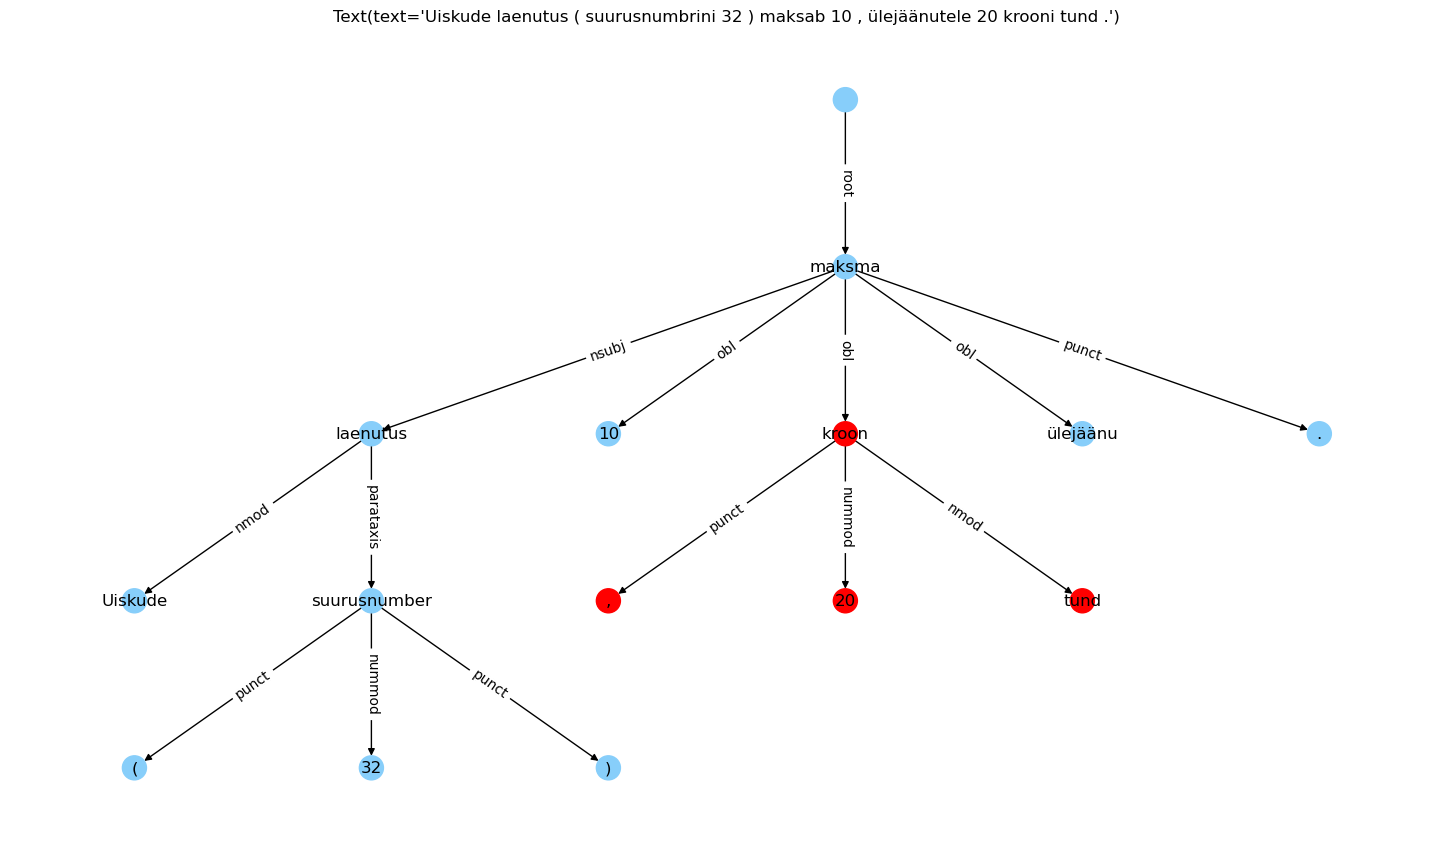

,col_id,root_id,word_count,consistent,punctuation_count,consistent_wo_punctuation,verb_normal_count,verb_unnormal_count
110353,77801,12,4,0,1,1,0,0


{'nodes': [9, 11, 12, 13], 'root_id': 12, 'root_lemma': 'kroon', 'root_case': 'part'}
Uiskude laenutus ( suurusnumbrini 32 ) maksab 10 __,__ ülejäänutele __20__ __krooni__ __tund__ .



/Users/rabauti/opt/anaconda3/envs/py38_estnltk1.7/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


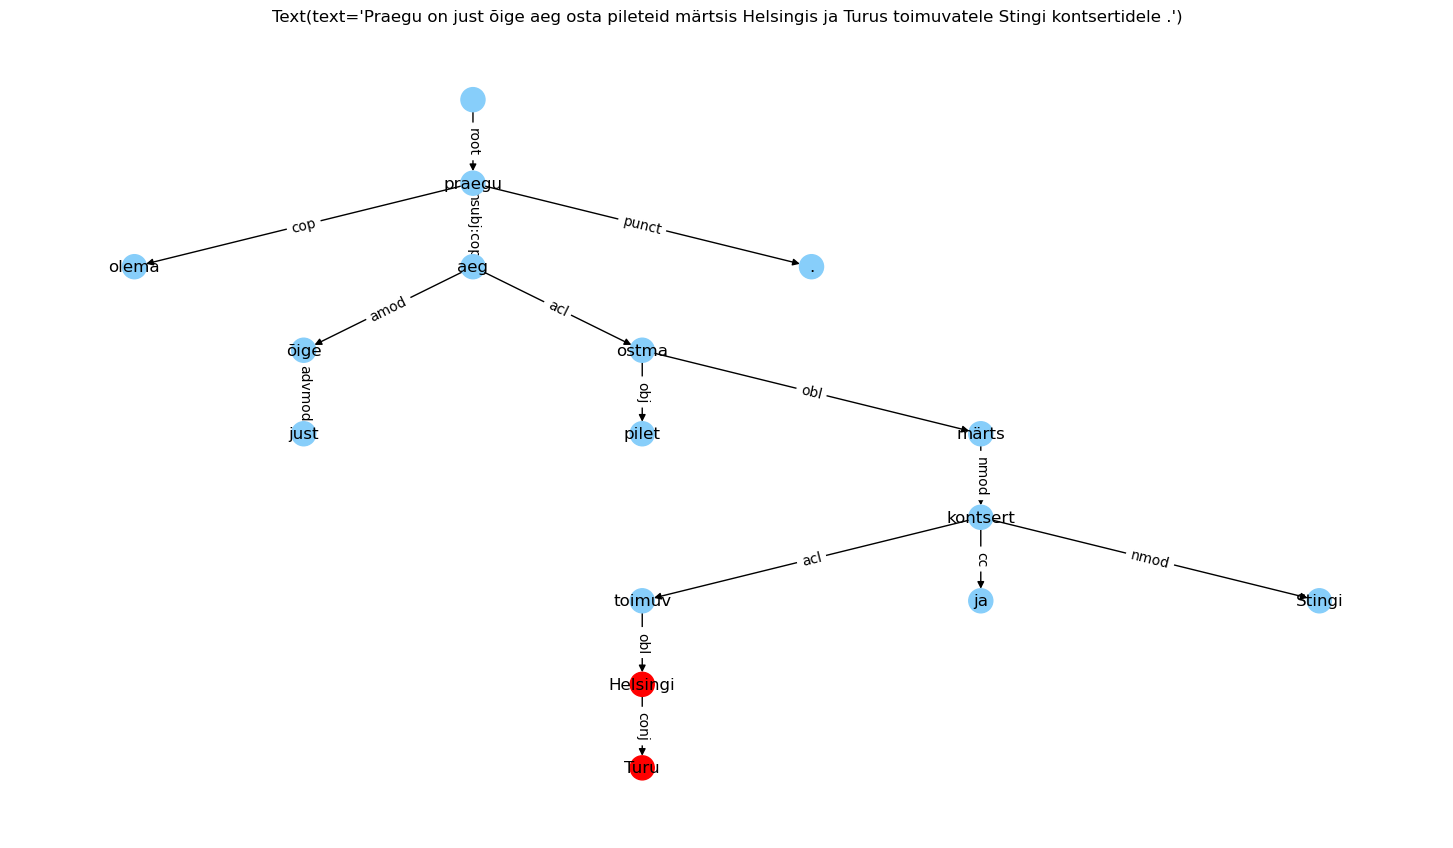

,col_id,root_id,word_count,consistent,punctuation_count,consistent_wo_punctuation,verb_normal_count,verb_unnormal_count
151277,110241,9,2,0,0,0,0,0


{'nodes': [9, 11], 'root_id': 9, 'root_lemma': 'Helsingi', 'root_case': 'in'}
Praegu on just õige aeg osta pileteid märtsis __Helsingis__ ja __Turus__ toimuvatele Stingi kontsertidele .



/Users/rabauti/opt/anaconda3/envs/py38_estnltk1.7/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


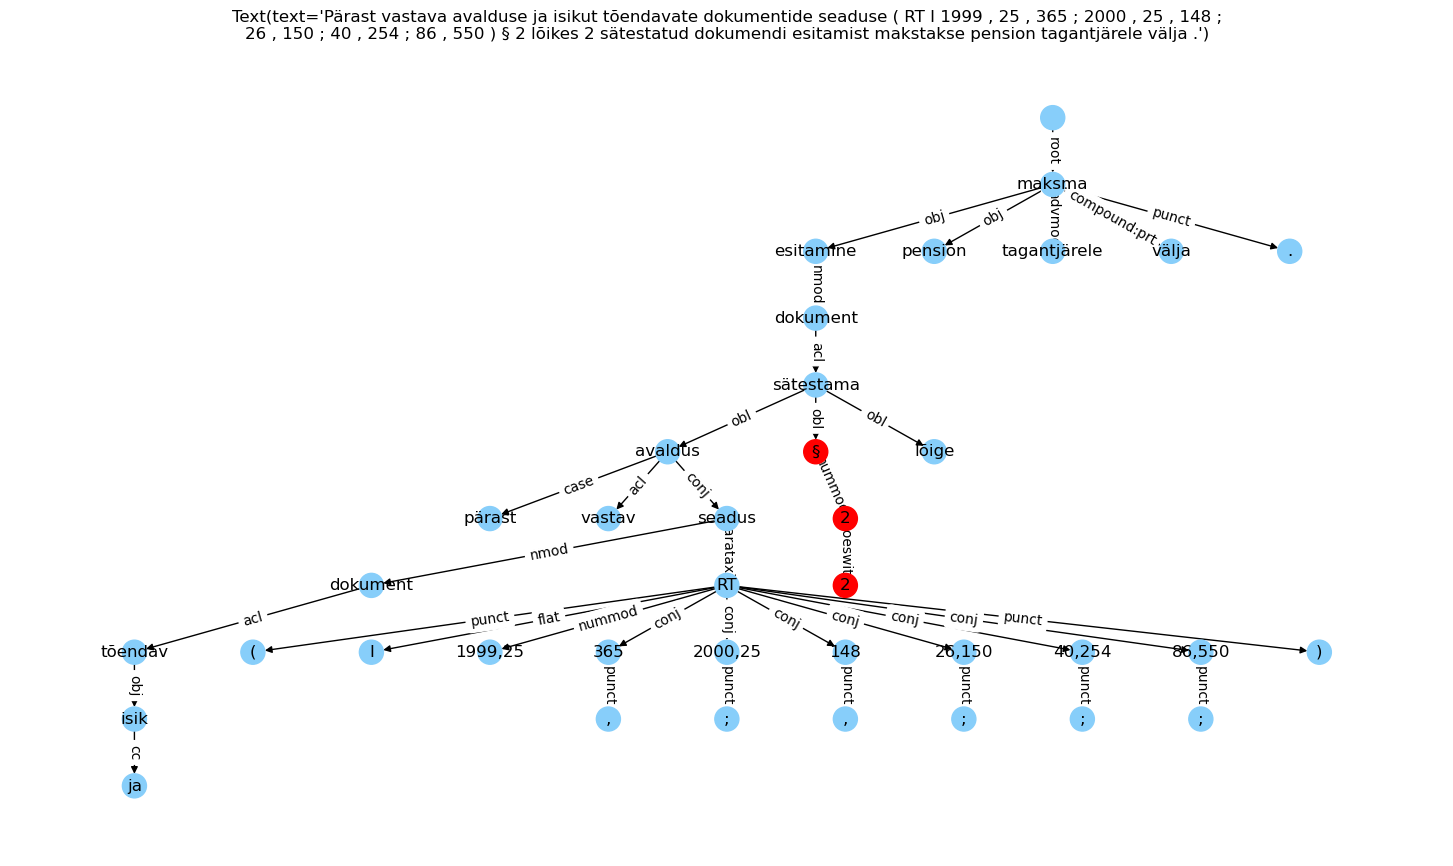

,col_id,root_id,word_count,consistent,punctuation_count,consistent_wo_punctuation,verb_normal_count,verb_unnormal_count
154991,113764,26,3,0,0,0,0,0


{'nodes': [26, 27, 29], 'root_id': 26, 'root_lemma': '§', 'root_case': '<käändumatu>'}
Pärast vastava avalduse ja isikut tõendavate dokumentide seaduse ( RT I 1999 , 25 , 365 ; 2000 , 25 , 148 ; 26 , 150 ; 40 , 254 ; 86 , 550 ) __§__ __2__ lõikes __2__ sätestatud dokumendi esitamist makstakse pension tagantjärele välja .



<Figure size 1850x1050 with 0 Axes>

In [10]:
random.shuffle(col_ids)
for col_id, text in my_db_reader.get_collections(col_ids=col_ids[:10], shuffle=False):
    
    graph = SyntaxGraph(text['v172_stanza_syntax'])
    for obl in graph.get_obl_info(text['v172_obl_phrases']):
        if obl['root_id'] in col_id_with_roots[col_id]:
            
            graph.draw_graph(title=str(text), highlight=obl['nodes'])
            display(df[(df['col_id'] == col_id) &  (df['root_id'] == obl['root_id'])] )
            print(obl)
            print( ' '.join([ '__' + graph.nodes[n]['form']+ '__' if n in obl['nodes'] else graph.nodes[n]['form']   for n in sorted(graph.nodes) if n ] ))
            print()
